# Exploratory Data Analysis (EDA)

## Purpose
The purpose of this notebook is to **understand the dataset** prior to any
feature engineering or model training.

This notebook is intentionally limited to:
- inspecting the dataset
- understanding feature meanings and ranges
- identifying data quality issues
- forming initial modeling assumptions

No models are trained in this notebook.

---

## Dataset
- File: `data/raw/california_housing.csv`
- Problem Type: Regression
- Target Variable: `MedHouseVal`

---

## Outcome
By the end of this notebook, we should be able to answer:
1. What are we predicting?
2. What inputs will the model use?
3. Is the dataset suitable for modeling?
4. What risks or constraints should we be aware of?

If these questions cannot be answered, the project should not proceed to modeling.


In [ ]:
# library imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/raw/california_housing.csv")
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# shape
df.shape

(20640, 9)

In [5]:
df.shape, df.columns


((20640, 9),
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'MedHouseVal'],
       dtype='object'))

### Goals

**Target:** Median house value  
**Features:** Neighborhood-level numeric attributes

In [ ]:
# checking whether this dataset is trainable before touching a model.

df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
# statistics

df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Distribution of Median House Value')

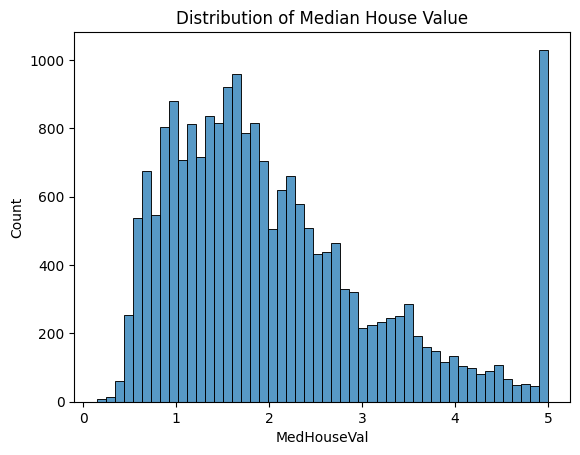

In [8]:
# histogram

sns.histplot(df["MedHouseVal"], bins=50)
plt.title("Distribution of Median House Value")


Text(0.5, 1.0, 'Income vs House Value')

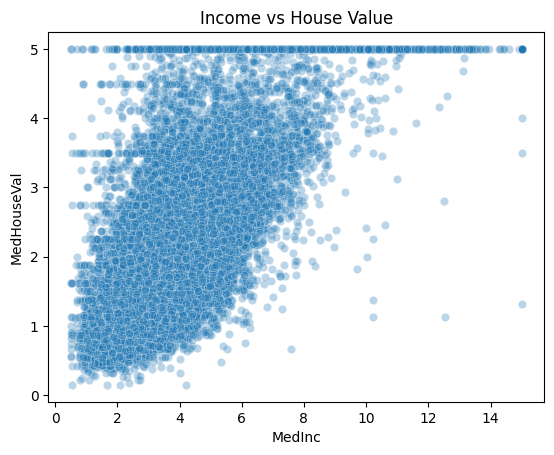

In [9]:
# scatter plot

sns.scatterplot(
    x=df["MedInc"],
    y=df["MedHouseVal"],
    alpha=0.3
)
plt.title("Income vs House Value")


# EDA Summary & Modeling Readiness

## Dataset
- Source: `data/california_housing.csv`
- Rows: ~20,000
- Features: 8 numeric
- Target: `MedHouseVal` (median house value)

## Problem Definition
This is a **regression problem**.
The objective is to predict median house value based on
neighborhood-level demographic and geographic features.

## Data Quality
- No missing values detected
- All features are numeric
- No immediate data integrity issues identified

## Feature Observations
- Feature scales vary significantly (e.g., income vs population)
- Geographic features (latitude, longitude) appear informative
- Income (`MedInc`) shows a strong relationship with the target

## Target Variable Observations
- Target distribution is right-skewed
- Upper bound appears capped, which may impact model performance
- Suitable for baseline regression modeling

## Risks & Considerations
- Feature scaling will be required for many models
- Potential multicollinearity among room-related features
- Target cap may limit achievable error metrics

## Decisions
- Proceed with baseline regression modeling
- Apply feature scaling during preprocessing
- Use RMSE as the primary evaluation metric
- Save trained model artifacts to `models/`

## Status
EDA complete. Dataset is suitable for feature engineering and modeling.
